<a href="https://colab.research.google.com/github/chang-heekim/Oxford-Pet-Dataset/blob/main/Oxford_Pet_Dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
from glob import glob
from datetime import datetime

import cv2
import xml.etree.ElementTree as et
from matplotlib.patches import Rectangle

import os

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device 

'cuda'

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/oxford_pet/annotations/list.txt', skiprows=6, delimiter=' ', header=None)
df.columns = ['file_name', 'id', 'species', 'breed']

In [ ]:
df.head()

,file_name,id,species,breed
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1


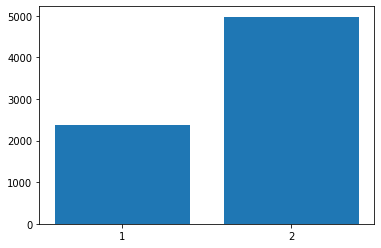

In [ ]:
value_counts = df['species'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)
plt.show()

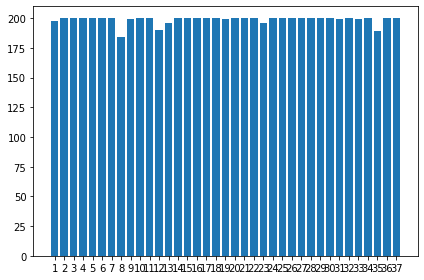

In [ ]:
value_counts = df['id'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)
plt.tight_layout()
plt.show()

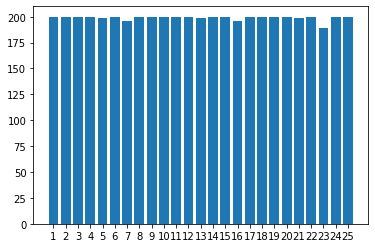

In [ ]:
value_counts = df[df['species'] == 2]['breed'].value_counts().sort_index()
 
plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)
plt.show()

In [ ]:
image_dir = '/content/drive/MyDrive/dataset/oxford_pet/images/'
bbox_dir = '/content/drive/MyDrive/dataset/oxford_pet/annotations/xmls/'
seg_dir = '/content/drive/MyDrive/dataset/oxford_pet/annotations/trimaps/'

In [ ]:
image_files = glob(image_dir + '*.jpg')
bbox_files = glob(bbox_dir + '*.xml')
seg_files = glob(seg_dir + '*.png')
len(image_files), len(bbox_files), len(seg_files)

(7378, 3685, 7390)

/content/drive/MyDrive/dataset/oxford_pet/annotations/xmls/shiba_inu_12.xml
/content/drive/MyDrive/dataset/oxford_pet/images/shiba_inu_12.jpg


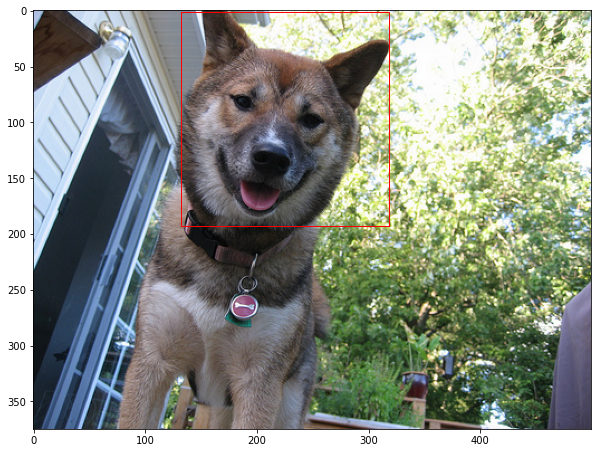

In [ ]:
image_path = image_files[0]
bbox_path = image_path.replace(image_dir, bbox_dir).replace('jpg', 'xml')
print(bbox_path)
print(image_path)

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

tree = et.parse(bbox_path)

xmin = float(tree.find('./object/bndbox/xmin').text)
xmax = float(tree.find('./object/bndbox/xmax').text)
ymin = float(tree.find('./object/bndbox/ymin').text)
ymax = float(tree.find('./object/bndbox/ymax').text)

rect_x = xmin
rect_y = ymin
rect_w = xmax - xmin
rect_h = ymax - ymin


rect = Rectangle((rect_x, rect_y), rect_w, rect_h, fill=False, color='red')
plt.figure(figsize=(10, 10))
plt.axes().add_patch(rect)
plt.imshow(image)
plt.show()

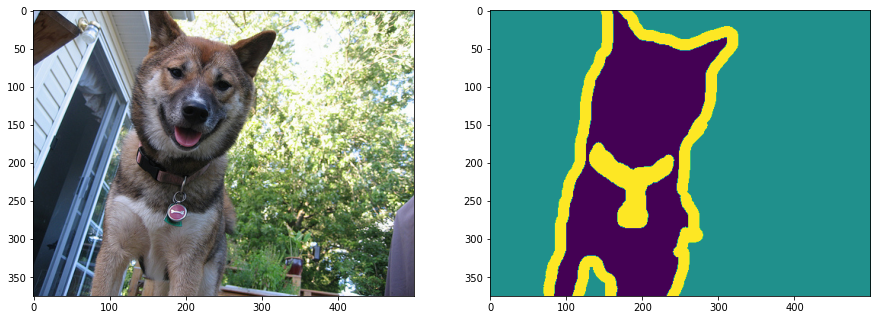

In [ ]:
image_path = image_files[0]
seg_path = image_path.replace(image_dir, seg_dir).replace('jpg', 'png')

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
seg_map = cv2.imread(seg_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(seg_map)
plt.show()